In [1]:
from src.loaders import triple_presliced_loaders
import yaml

ImportError: cannot import name 'triple_presliced_loaders' from 'src.loaders' (/home/ws/tb0536/projects/training-repo/src/loaders.py)

In [2]:
with open('training_configs/dataset/eyes_triple.yaml') as f:
    dset_cfg = yaml.safe_load(f)

In [3]:
del dset_cfg['loaders_function']

In [4]:
del dset_cfg['dataset_kwargs']['label_converter']

In [5]:
dset_cfg['train_test_split_kwargs'] = {'volumes_limit': 5}

In [6]:
%%time
datasets = triple_presliced_loaders(**dset_cfg)

CPU times: user 5.65 s, sys: 2.94 s, total: 8.58 s
Wall time: 6.85 s


In [7]:
datasets

{'train': <torch.utils.data.dataloader.DataLoader at 0x7efc38789700>,
 'valid': <torch.utils.data.dataloader.DataLoader at 0x7efc38789a00>,
 'valid_extrapolation': <torch.utils.data.dataloader.DataLoader at 0x7efc38fd61f0>}

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
train_loader = datasets['train'].__iter__()

In [10]:
train_batch = train_loader.__next__()

In [11]:
test_loader = datasets['valid'].__iter__()

In [12]:
test_batch = test_loader.__next__()

In [13]:
import numpy as np

def plot_pair(img, msk):
    img = img.detach().cpu().numpy()[0]
    msk = msk.detach().cpu().numpy()[0].astype(np.uint8)
    plt.figure(figsize=(16, 10))
    plt.imshow(img, cmap='gray')
    plt.imshow(msk, cmap='tab10', alpha=0.4)#, alpha=msk>0)
    plt.show()

In [14]:
datasets['train'].dataset, datasets['valid'].dataset, datasets['valid_extrapolation'].dataset

(<torch.utils.data.dataset.Subset at 0x7efc387893d0>,
 <torch.utils.data.dataset.ConcatDataset at 0x7efc38fd6c40>)

In [15]:
qaccess = datasets['valid'].dataset.datasets[0].segmentation.data

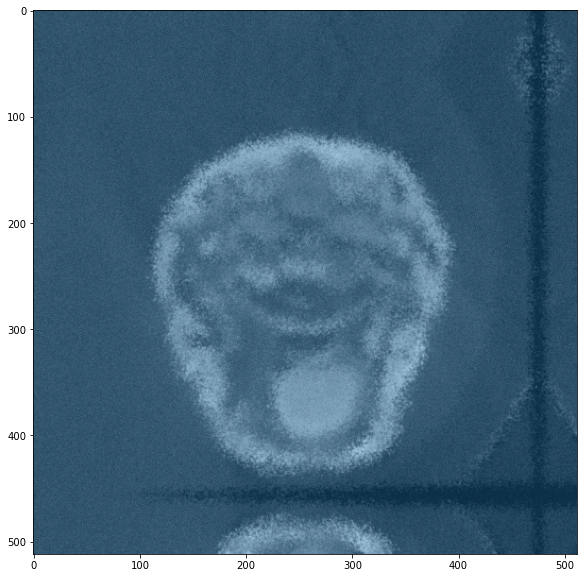

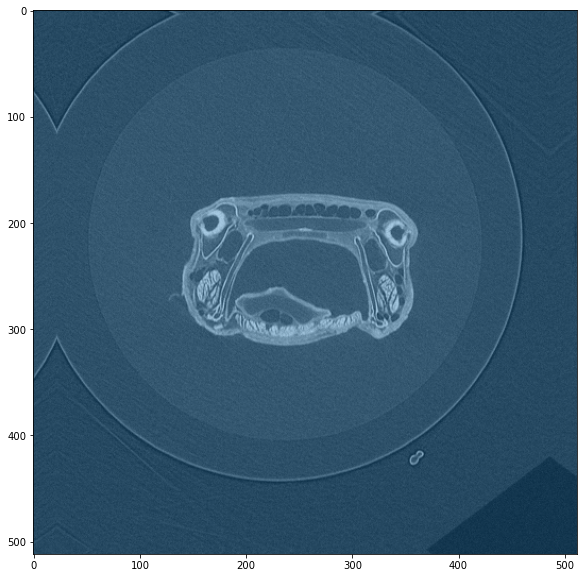

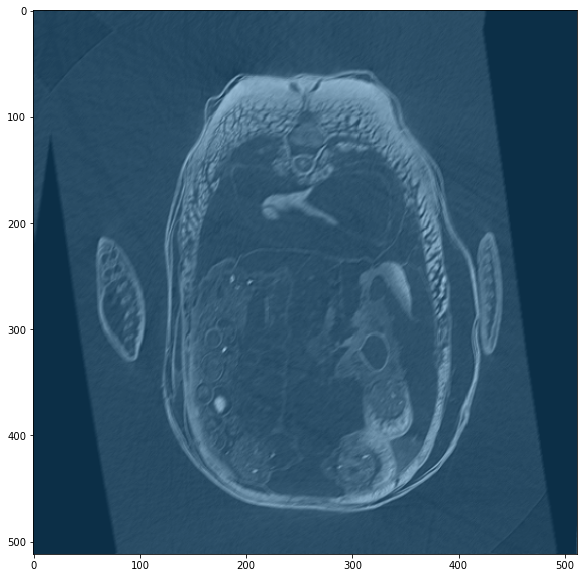

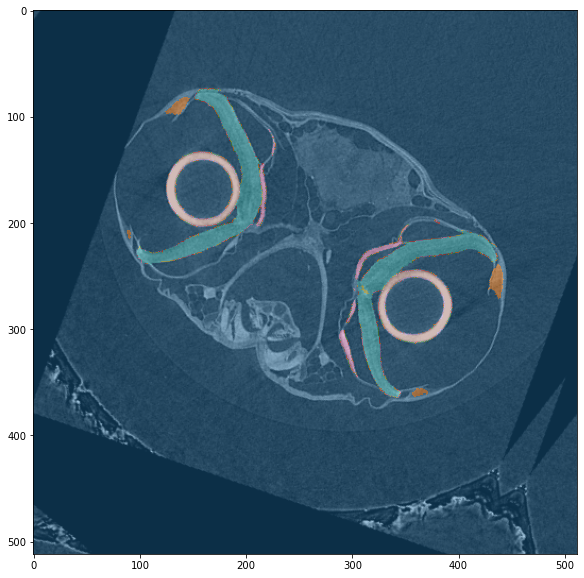

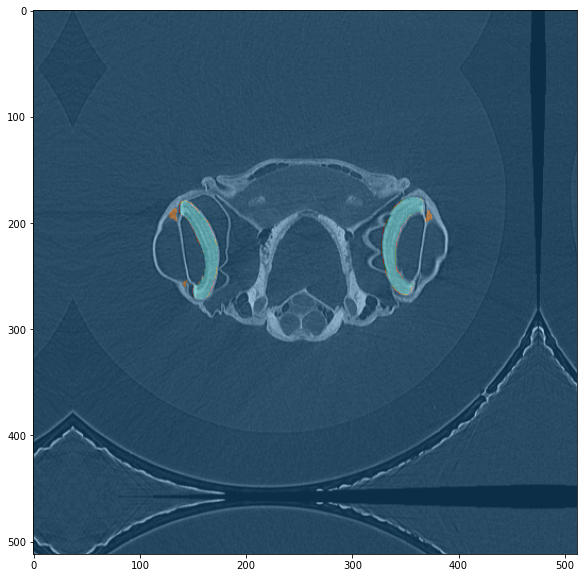

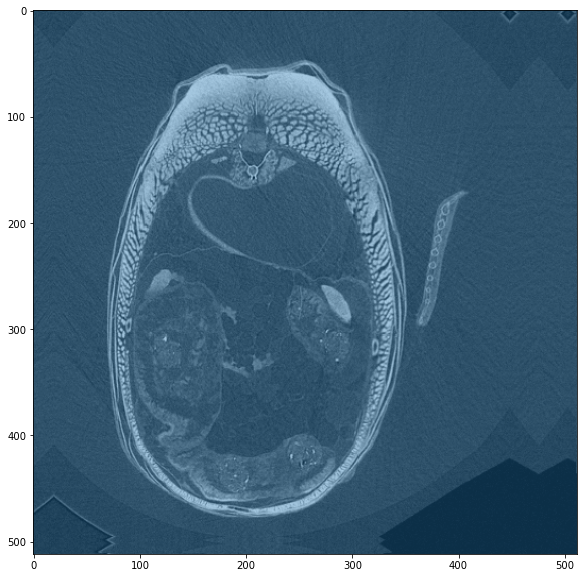

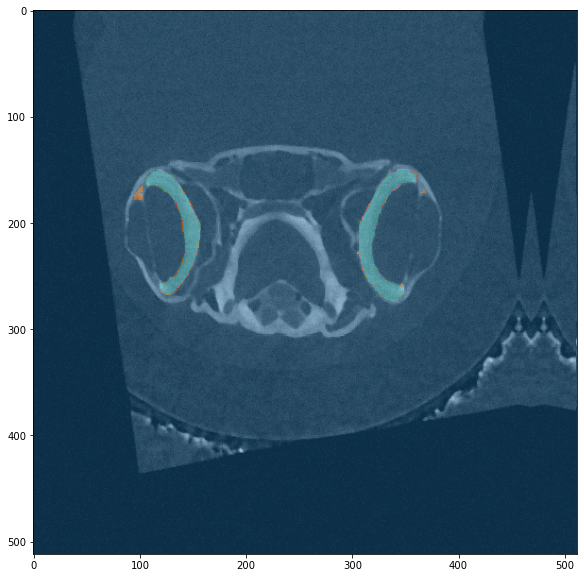

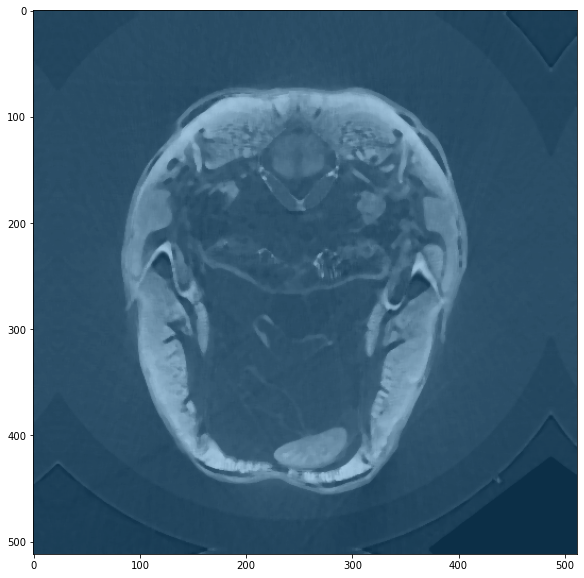

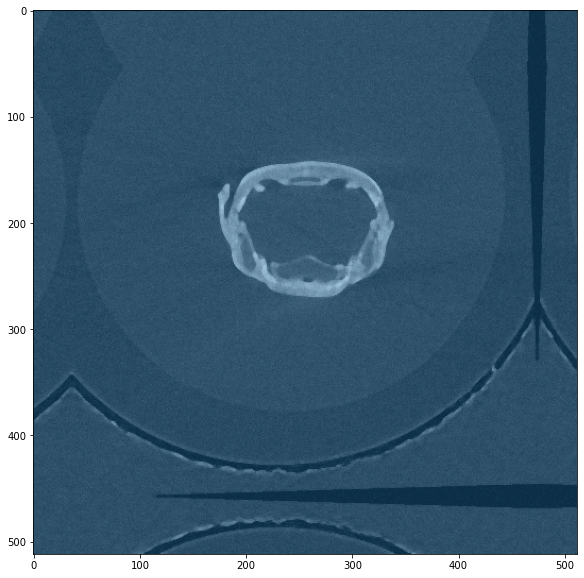

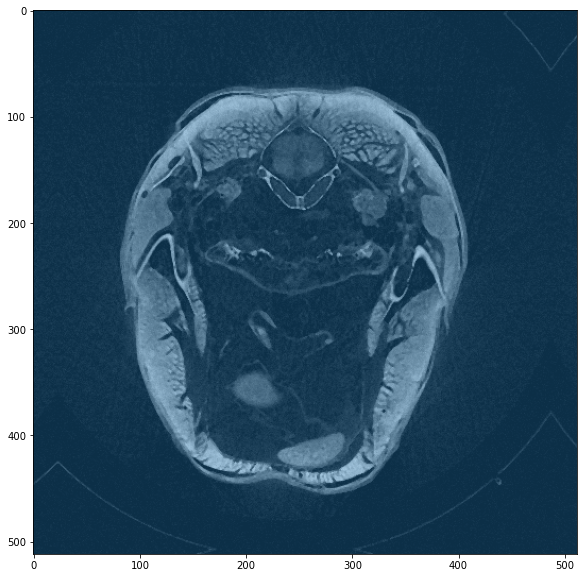

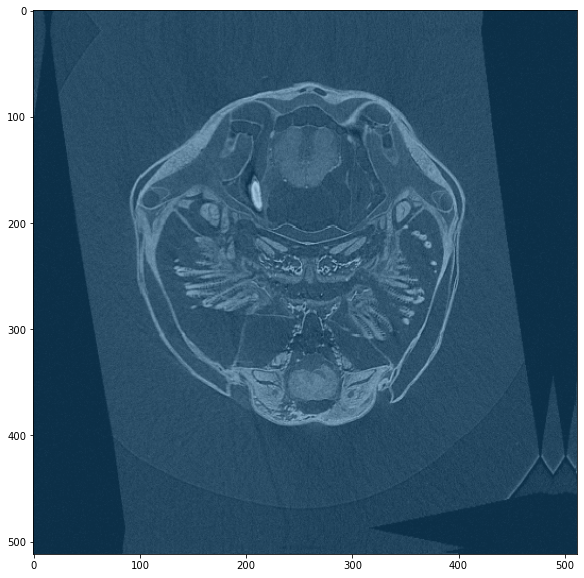

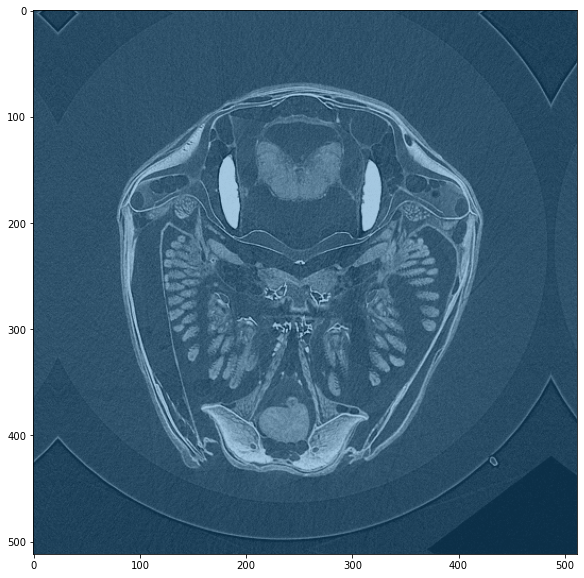

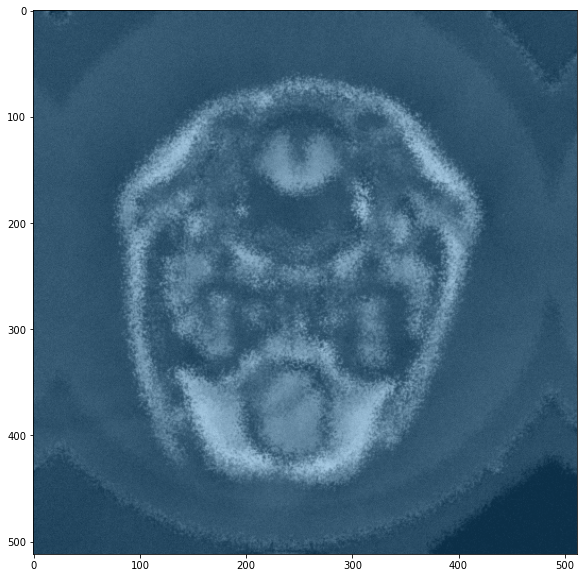

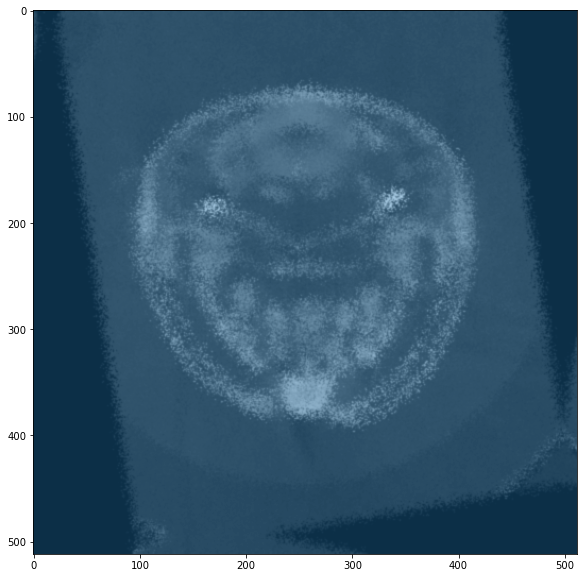

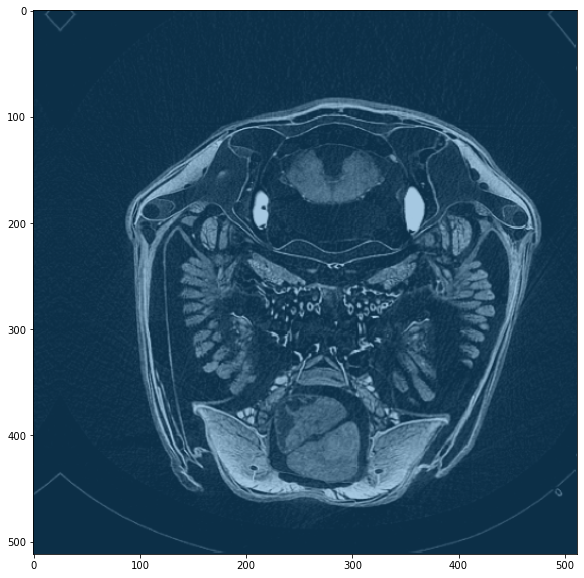

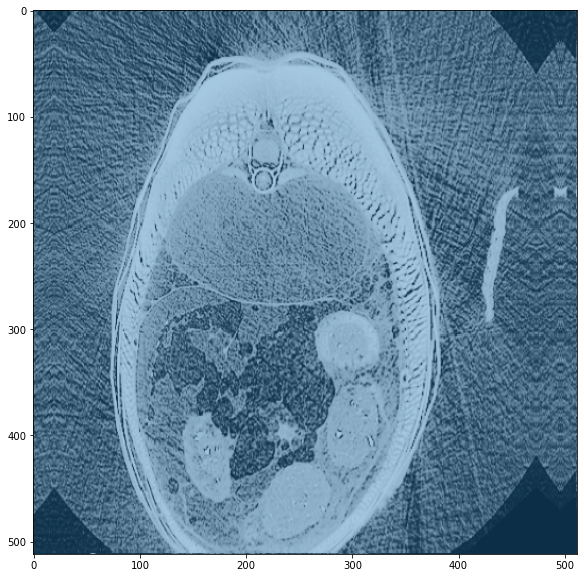

In [18]:
for sample in zip(*test_batch):
    plot_pair(*sample)